##### Overview

Hi everyone. I've written some code to read in the data and get started. I've added the ability to specify  samp/year/week for those who can't read 6 GB of data into their RAM.
Place this notebook file in the MelbDatathon2018 folder.

In [163]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gzip
import glob
import re

pd.set_option('display.max_colwidth', -1)

Get the files, specify sample, year, weeks.

In [249]:
# years we care about
years = [2018]

# weeks we care about
weeks = [2, 3]
weeks = ['Week'+str(w) for w in weeks]

# samples we care about (Samp_0, Samp_1)
samps = ['Samp_0']

# all files!
files = glob.glob(os.getcwd() + '*/*/*/*/*/*.txt.gz', recursive=True)

# filter for files we want

# tap on
tap_on_files = []
for f in files:
    if sum([bool(re.search(pattern='ScanOnTransaction', string=f))]):
        if sum([bool(re.search(pattern=s, string=f)) for s in samps]):
            if sum([bool(re.search(pattern='\\\\'+str(y), string=f)) for y in years]):
                if sum([bool(re.search(pattern=w+'\\\\', string=f)) for w in weeks]):
                    tap_on_files.append(f)

# tap off
tap_off_files = []
for f in files:
    if sum([bool(re.search(pattern='ScanOffTransaction', string=f))]):
        if sum([bool(re.search(pattern=s, string=f)) for s in samps]):
            if sum([bool(re.search(pattern='\\\\'+str(y), string=f)) for y in years]):
                if sum([bool(re.search(pattern=w+'\\\\', string=f)) for w in weeks]):
                    tap_off_files.append(f)

                    
                    
print(pd.DataFrame(tap_on_files))
print(pd.DataFrame(tap_off_files))


                                                                                                              0
0  C:\Users\ben\Desktop\MelbDatathon2018\Samp_0\ScanOnTransaction\2018\Week2\QID3532995_20180713_34925_0.txt.gz
1  C:\Users\ben\Desktop\MelbDatathon2018\Samp_0\ScanOnTransaction\2018\Week3\QID3533008_20180713_35019_0.txt.gz
                                                                                                               0
0  C:\Users\ben\Desktop\MelbDatathon2018\Samp_0\ScanOffTransaction\2018\Week2\QID3530175_20180713_12533_0.txt.gz
1  C:\Users\ben\Desktop\MelbDatathon2018\Samp_0\ScanOffTransaction\2018\Week3\QID3530192_20180713_12606_0.txt.gz


Get the data

In [250]:

df_on = pd.concat([pd.read_csv(filepath_or_buffer=f, sep='|', compression='gzip', header=None) for f in tap_on_files])
df_on.columns = ['mode', 'businessdate', 'datetime', 'cardid', 'cardtype', 'vehicleid', 'parentroute', 'routeid', 'stopid']
df_on = df_on.assign(tap = 'on')

df_off = pd.concat([pd.read_csv(filepath_or_buffer=f, sep='|', compression='gzip', header=None) for f in tap_off_files])
df_off.columns = ['mode', 'businessdate', 'datetime', 'cardid', 'cardtype', 'vehicleid', 'parentroute', 'routeid', 'stopid']
df_off = df_off.assign(tap = 'off')

df = pd.concat([df_on,df_off])

# remove unwanted files 
del(df_on)
del(df_off)

df.head(10)

,mode,businessdate,datetime,cardid,cardtype,vehicleid,parentroute,routeid,stopid,tap
0,2,2018-01-11,2018-01-11 17:56:09,13451170,1,0,NaN,1,64404,on
1,2,2018-01-11,2018-01-11 17:23:20,21928980,1,0,NaN,1,64404,on
2,2,2018-01-11,2018-01-11 15:29:48,7719590,1,0,NaN,1,64404,on
3,2,2018-01-11,2018-01-11 17:17:53,17988890,1,0,NaN,1,64404,on
4,2,2018-01-11,2018-01-11 17:05:46,22592600,1,0,NaN,1,64404,on
5,2,2018-01-11,2018-01-11 09:10:03,21648190,1,0,NaN,1,64404,on
6,2,2018-01-11,2018-01-11 17:56:45,9108090,1,0,NaN,1,64404,on
7,2,2018-01-11,2018-01-11 18:19:34,20018830,1,0,NaN,1,64404,on
8,2,2018-01-11,2018-01-11 20:04:44,19928050,1,0,NaN,1,64404,on
9,2,2018-01-08,2018-01-08 16:20:08,18815410,1,0,NaN,1,64404,on


In [251]:
print(df.shape)

(2138639, 10)


2    624643
1    213816
3    172663
Name: mode, dtype: int64


<bound method Figure.show of <matplotlib.figure.Figure object at 0x00000197463929E8>>

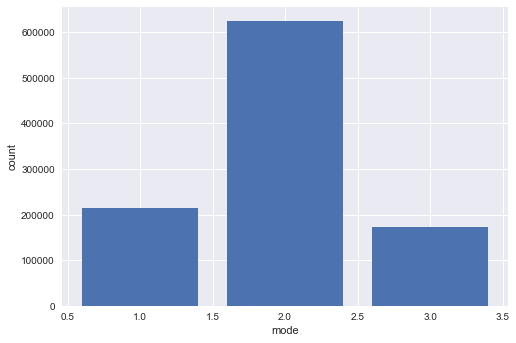

In [231]:
# Could be bus, tram, train..... might need a map to verity
mode_counts = df.loc[:,'mode'].value_counts()

fig, ax = plt.subplots()

ax.bar(left=mode_counts.index, height=mode_counts)
ax.set_xlabel('mode')
ax.set_ylabel('count')

print(mode_counts)

fig.show


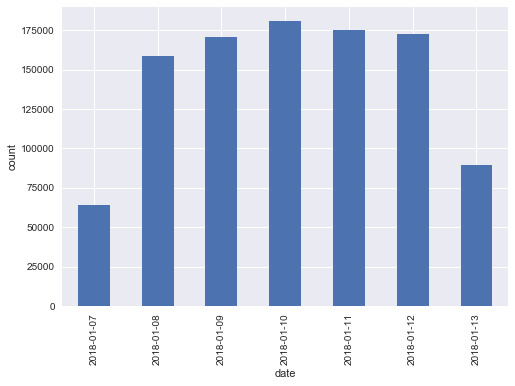

In [246]:
date_counts = df.loc[:,'businessdate'].value_counts().sort_index()
# sunday to saturday 

ax = date_counts.plot(kind='bar')
ax.set_xlabel('date')
ax.set_ylabel('count')


off    431250
on     579872
Name: tap, dtype: int64


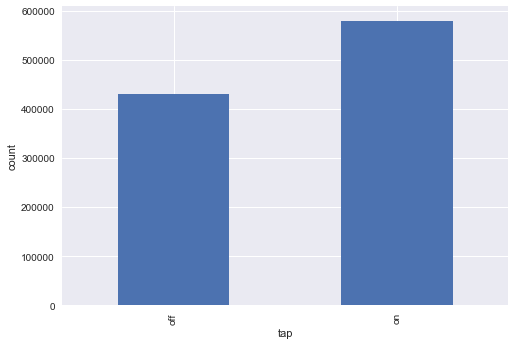

In [248]:
tap_counts = df.loc[:,'tap'].value_counts().sort_index()
# sunday to saturday 
print(tap_counts)
ax = tap_counts.plot(kind='bar')
ax.set_xlabel('tap')
ax.set_ylabel('count')